# Using the VGG16 Convolutional Base as Frozen Base

In [1]:
from keras.applications import VGG16

# The include_top argument specifies whether we want to include the densely connected classifier in the top
conv_base = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(150, 150, 3))

## Import, Directory Paths

In [2]:
import os
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers


base_dir = './'

train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')                           

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')                 

## Model with VGG16 Base

In [3]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

## Freeze the Convolutional Base

In [4]:
conv_base.trainable = False

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [6]:
len(model.trainable_weights)

4

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit(
    train_generator, 
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
100/100 [==============================] - 458s 5s/step - loss: 0.6987 - acc: 0.5675 - val_loss: 0.5170 - val_acc: 0.7860
Epoch 2/50
100/100 [==============================] - 459s 5s/step - loss: 0.5570 - acc: 0.7205 - val_loss: 0.4245 - val_acc: 0.8260
Epoch 3/50
100/100 [==============================] - 466s 5s/step - loss: 0.5114 - acc: 0.7510 - val_loss: 0.3776 - val_acc: 0.8500
Epoch 4/50
100/100 [==============================] - 465s 5s/step - loss: 0.4816 - acc: 0.7715 - val_loss: 0.3587 - val_acc: 0.8620
Epoch 5/50
100/100 [==============================] - 468s 5s/step - loss: 0.4432 - acc: 0.7915 - val_loss: 0.3276 - val_acc: 0.8810
Epoch 6/50
100/100 [==============================] - 466s 5s/step - loss: 0.4336 - acc: 0.7960 - val_loss: 0.3045 - val_acc: 0.8840
Epoch 7/50
100/100 [==============================] - 469s 5s/step - loss: 0.4282 - acc: 0.8050 - val_loss: 0.3021 - v

In [8]:
model.save('cats_and_dogs_small_4.h5')

## Training and Validation Accuracy

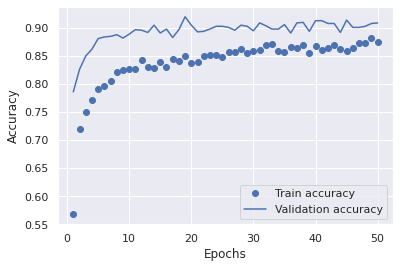

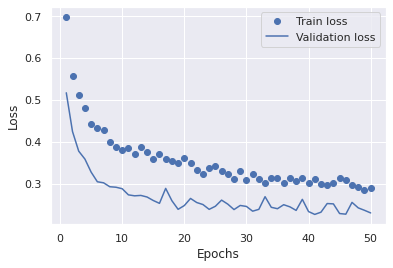

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


epochs = range(1, len(history.history['loss']) + 1)
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Train accuracy')
plt.plot(epochs, val_acc, '-', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, '-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Training Accuracy Lower Than Validation Accuracy

A Keras model has two modes: training and testing. Regularization mechanisms, such as Dropout and L1/L2 weight regularization, are turned off at testing time. They are reflected in the training time loss but not in the test time loss.

Besides, the training loss is the average of the losses over each batch of training data. Because your model is changing over time, _the loss over the first batches of an epoch is generally higher than over the last batches_. On the other hand, the testing loss for an epoch is computed using the model as it is at the end of the epoch, resulting in a lower loss.